这里主要讲述基础的NumPy用法，集中在如下几个方面：  
1. 数组的向量化运算，主要针对数据清洗，转换和过滤等操作；  
1. 诸如排序，唯一性，集合等针对数组的操作；  
1. 针对数据描述性或者聚合类操作；  
1. 数据的merge和join等操作；  
1. 数组中的条件逻辑语句，而不是使用诸如`if-elif-else`语句；  
1. 更丰富的函数功能，尤其针对数据处理而言。

### 1. 创建新的ndarray

In [3]:
# 1. 使用array()函数
data1 = [6, 7.5, 8, 0, 1]

import numpy as np
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

如果传入一个长度相同的内嵌序列，诸如list，那么会自动转换成multi-dimensional array：

In [4]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

其他方式诸如使用`zeros(), ones(), empty(), eye(), identity()`等函数创建

使用`np.arange()`，功能类似python自带的`range()`，但是返回一个ndarray，而不是一个list。

In [11]:
# this is an array
arr3 = np.arange(5)
print type(arr3)
# this is a list
lst = range(5)
print type(lst)

<type 'numpy.ndarray'>
<type 'list'>


### 2. indexing

重点介绍`fancy indexing`，说白了就是用一个数组作为index去获取另一个数组对应的元素。比如：

In [14]:
## case 1
arr = np.empty((4,2))
for i in range(4):
    arr[i] = i
arr

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

In [15]:
arr[[0, 2]]

array([[ 0.,  0.],
       [ 2.,  2.]])

In [16]:
## case 2
arr = np.arange(16).reshape((8, 2))
arr

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15]])

In [17]:
# 此时如果传入多维数组
# 相当于取值(1, 0), (3, 1), (4, 0)
arr[[1,3,4], [0, 1, 0]]

array([2, 7, 8])

In [19]:
# 如果需要类似case 1的结果：
arr[[1,3,4]][:, [0,1,0]]

array([[2, 3, 2],
       [6, 7, 6],
       [8, 9, 8]])

### 利用数组进行数据处理

#### 1. 比如`np.meshgrid()`函数，输入是两个1-D的数组，输出是2D的matrix：

In [25]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
xs
#ys

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ..., 
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

比如我们需要$z = \sqrt{x^2 + y^2}$:

In [26]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

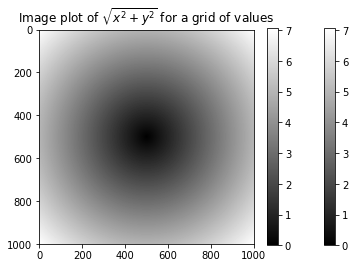

In [28]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()

#### 2. 利用条件逻辑进行数组运算

比如我们有如下两个数组，`xarr`和`yarr`，条件数组`cond`，根据`cond`为True返回`xarr`的数值，否则`yarr`的数值：

In [30]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

如果我们用正常pythonic的方法来实现：

In [33]:
res = [(x if c else y)
      for x, y, c in zip(xarr, yarr, cond)]
res

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

这样写的问题是：1. 如果数组很大，速度很慢；2. 对于多维数组无法work  

如果使用条件逻辑：

In [34]:
res = np.where(cond, xarr, yarr)
res

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [36]:
def cond_py(xarr, yarr, cond):
    res = [(x if c else y)
      for x, y, c in zip(xarr, yarr, cond)]
def cond_np(xarr, yarr, cond):
    res = np.where(cond, xarr, yarr)

In [37]:
%timeit cond_py(xarr, yarr, cond)

The slowest run took 5.25 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.99 µs per loop


In [38]:
%timeit cond_np(xarr, yarr, cond)

The slowest run took 14.73 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.49 µs per loop


从上述时间比较可以看出，numpy的condition速度上较纯python快一倍多。

那么这个在实际数据分析中有什么用呢？比如有一个矩阵，对其中某些元素大于某个特定数值，我们进行特别处理（比如用某个数值替代）：

In [49]:
arr = np.random.randn(4, 4)
arr

array([[-0.63734784, -0.42006062,  0.30478701,  1.47740513],
       [-2.24384147, -1.14078646, -1.60464155,  2.81396943],
       [ 1.30560085,  0.05068352,  0.31349779, -0.00391782],
       [-0.01236318,  0.20803011, -0.16725316, -0.01176084]])

In [50]:
# 如果元素>0, 那么赋值为2，否则-2
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [-2, -2, -2,  2],
       [ 2,  2,  2, -2],
       [-2,  2, -2, -2]])

In [52]:
# 也可以保留数组不动
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.63734784, -0.42006062,  2.        ,  2.        ],
       [-2.24384147, -1.14078646, -1.60464155,  2.        ],
       [ 2.        ,  2.        ,  2.        , -0.00391782],
       [-0.01236318,  2.        , -0.16725316, -0.01176084]])

### 线性代数相关

和MATLAB等语法不同，如果使用`*`，表示element-wise乘法而不是矩阵的相乘。如果需要矩阵乘法，那么可以使用数组的方法`dot()`或者`np.dot()`:

In [53]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [56]:
x.dot(y) 

array([[  28.,   64.],
       [  67.,  181.]])

In [57]:
np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

这里重点介绍`np.linalg`，包含了矩阵求逆，行列式等的计算。底层的实现是和其他诸如MATLAB相似的Fortran库函数。

In [58]:
from numpy.linalg import inv, qr

In [61]:
X = np.random.randn(5, 5)
mat = X.T.dot(X)

inv(mat).dot(mat)

array([[  1.00000000e+00,  -3.18137007e-17,  -3.89086936e-15,
          7.79767264e-16,   0.00000000e+00],
       [  3.17636491e-17,   1.00000000e+00,   5.53559018e-16,
          2.66335897e-16,   0.00000000e+00],
       [  4.70509047e-17,  -3.06346868e-16,   1.00000000e+00,
         -4.32099494e-17,   0.00000000e+00],
       [ -1.54966698e-16,   5.11955748e-16,   2.10468540e-16,
          1.00000000e+00,   0.00000000e+00],
       [ -1.11022302e-16,  -2.22044605e-16,   1.66533454e-16,
          5.55111512e-16,   1.00000000e+00]])

In [63]:
qr?